### Pipelines in scikit-learn

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',\
                 header=None)

In [3]:
df.describe #569*32 30 features前面两个分别是标号和对应的的诊断

<bound method NDFrame.describe of            0  1       2      3       4       5        6        7         8   \
0      842302  M  17.990  10.38  122.80  1001.0  0.11840  0.27760  0.300100   
1      842517  M  20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900   
2    84300903  M  19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400   
3    84348301  M  11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400   
4    84358402  M  20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000   
5      843786  M  12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800   
6      844359  M  18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700   
7    84458202  M  13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660   
8      844981  M  13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900   
9    84501001  M  12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300   
10     845636  M  16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990   
11   84610002  M  

In [6]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
le.transform(['M',"B"])

array([1, 0])

In [10]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

/home/lily/tf3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


将Pipeline中嵌入StandardScaler,PCA,LogisticRegression

Pipeline对象的输入是一个元组组成的列表，每个元组的第一个值是任意的指示字符串表示在pipeline中进入单一元素，第二个元素是scikit-learn的transformer或者estimator。

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression())])
pipe_lr.fit(X_train,y_train)
print('Test Accuracy:%.3f'%pipe_lr.score(X_test,y_test))

Test Accuracy:0.947


In [15]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y=y_train, n_folds=10)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist: %s, Acc: %.3f'%(k+1, np.bincount(y_train[train]), score))
print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

Fold: 1, Class dist: [256 153], Acc: 0.891
Fold: 2, Class dist: [256 153], Acc: 0.978
Fold: 3, Class dist: [256 153], Acc: 0.978
Fold: 4, Class dist: [256 153], Acc: 0.913
Fold: 5, Class dist: [256 153], Acc: 0.935
Fold: 6, Class dist: [257 153], Acc: 0.978
Fold: 7, Class dist: [257 153], Acc: 0.933
Fold: 8, Class dist: [257 153], Acc: 0.956
Fold: 9, Class dist: [257 153], Acc: 0.978
Fold: 10, Class dist: [257 153], Acc: 0.956
CV accuracy: 0.950 +/- 0.029


In [16]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy scores: [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]
CV accuracy: 0.950 +/- 0.029


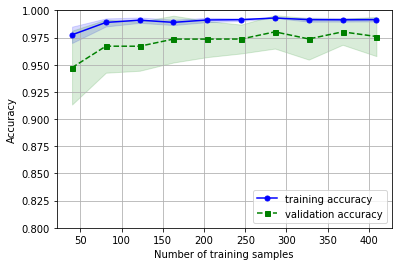

In [28]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,\
                                                       X=X_train,y=y_train,\
                                                       train_sizes=np.linspace(0.1, 1.0, 10),\
                                                       #np.linspace(start,stop,num)
                                                       cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()                

由上面的图可以看出来，训练集的方差小，但是验证集的方差大。

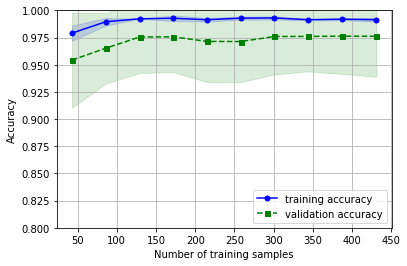

In [27]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,\
                                                       X=X_train,y=y_train,\
                                                       train_sizes=np.linspace(0.1, 1.0, 10),\
                                                       cv=20,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()   

当M的值增加的时候，验证集的方差更加大了。但是偏差（模型的估计值和真实值之间的差距）会变小，因为参加拟合模型的训练样本量很大。

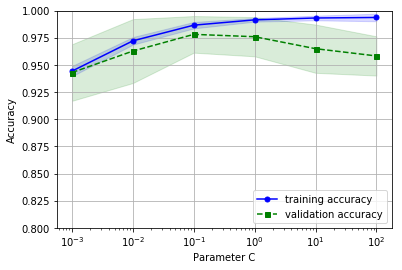

In [36]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #regularization strength,small C large regularization strength
train_scores,test_scores = validation_curve(estimator=pipe_lr, X = X_train, y=y_train, \
                                            param_name='clf__C',param_range=param_range,cv=10) #注意param_name,这里下划线是两个
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std  = np.std(test_scores, axis=1)
plt.plot(param_range,train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log') #注意这里对x轴取了对数值
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

由上图所示，在C=0.1的时候validadtion的准确程度是最佳的，选择这个点最佳，在sklearn的实现当中，C越大正则越小，样请间下面的图片
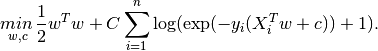

In [45]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},\
              {'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}] # C是正则的倒数
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
#print(gs.grid_scores_)

0.978021978021978
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [46]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy:%.3f'%clf.score(X_test,y_test))

Test accuracy:0.965


In [47]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv = 5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.972 +/- 0.012


In [48]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),\
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],scoring='accuracy',cv=5)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.917 +/- 0.009


In [57]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


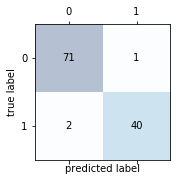

In [58]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


在sklearn中，正样本默认值为1,如果需要修改，可以利用sklearn.metrics里make_scorer进行修改。

In [63]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator= pipe_svc, param_grid = param_grid, scoring=scorer, cv=10)

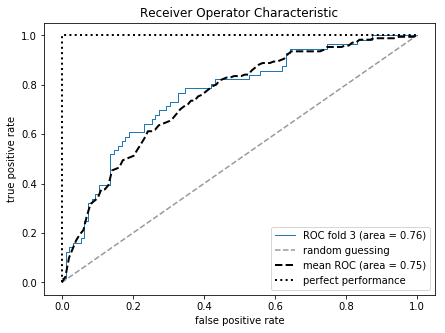

In [65]:
from sklearn.metrics import roc_curve, auc
from scipy import interp # interp是线性插值函数，interp(x,xp,fp)x代表要预测的x轴的值，xp是给定数据的x轴的值，fp是给定数据的y轴的值
X_train2 = X_train[:, [4, 14]]
cv = StratifiedKFold(y_train,n_folds=3,random_state=1)
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:, 1],pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)'% (i+1, roc_auc))
plt.plot([0, 1],[0, 1],linestyle='--',color=(0.6, 0.6, 0.6),label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],[0, 1, 1],lw=2,linestyle=':',color='black',label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
pipe_svc = pipe_svc.fit(X_train2, y_train)
y_pred2 = pipe_svc.predict(X_test[:, [4, 14]])
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.671
Accuracy: 0.728


在scikit-learn中，多分类粉体有两种评价方式，macro和micro两种，都是通过一堆多来进行分类。  
> micro average:
 precision_micro = (TP1+TP2+...+TPK)/(TP1+TP2+...+TPK+FP1+FP2+...FPK)  
 precision_macro = (precision1+precision2+...+precisionk)/k
 
如果说想要把每个样本的权重都看成一样的，micro-averageing是有用的  
macro-averaging 是将所有的类别都同等对待  
加权的macro-averaging通过对每个类别的label用正确的样本类别评分来加权，当类别分布不均时，这种方法是非常有效的。  
在scikit-learn中间，加权的macro-averaging是默认的，可以通过改变average参数来改变评分

In [68]:
pre_scorer = make_scorer(score_func=precision_score, pos_label=1, greater_is_better=True,
                        average='micro')

### Ensemble learning 

In [69]:
from scipy.misc import comb
import math
def ensemble_error(n_classifier,error):
    k_start = math.ceil(n_classifier/2.0)
    probs = [comb(n_classifier, k)*error**k*(1-error)**(n_classifier-k) for k in range(k_start, n_classifier+1)]
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)

/home/lily/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  """


0.03432750701904297

/home/lily/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  """


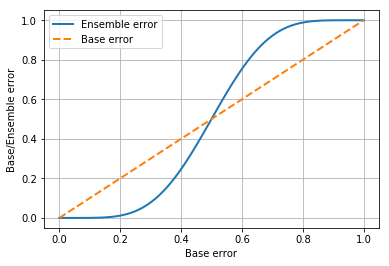

In [70]:
import numpy as np
error_range = np.arange(0.0,1.01,0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
import matplotlib.pyplot as plt
plt.plot(error_range, ens_errors, label='Ensemble error',linewidth=2)
plt.plot(error_range, error_range, linestyle='--',label='Base error',linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

plurality voting(majority voting) implementation

In [72]:
import numpy as np
np.argmax(np.bincount([0,0,1], weights=[0.2,0.2,0.6]))

1

In [75]:
ex = np.array([[0.9, 0.1],
               [0.8, 0.2],
               [0.4, 0.6]])
p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
np.argmax(p)

0

In [111]:
# impelemaennt a MajorityVoteClassifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin): #继承了两个父类
    """ 
    A majority vote ensemble classifier
    
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
      
    vote : str, {'classlabel', 'probability'}
      Default: 'classlabel'
      If 'classlabel' the prediction is based on
      the argmax of class labels. Else if
      'probability', the argmax of the sum of
      probabilities is used to predict the class label
      (recommended for calibrated classifiers).
      
    weights : array-like, shape = [n_classifiers]
      Optional, default: None
      If a list of `int` or `float` values are
      provided, the classifiers are weighted by
      importance; Uses uniform weights if `weights=None`.
    """
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key,value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        """
        Fit classifiers:
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Matrix of training samples.
        y : array-like, shape = [n_samples]
            Vector of target class labels.
            
        Returns
        -------
        self : object
        """
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        """ Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_samples, n_features]
            Matrix of training samples.
            
        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: #'classlabel' vote
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)),\
                                           axis=1, arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
        
    def predict_proba(self,X): # use to compute ROC AUC
        """ Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Training vectors, where n_samples is
            the number of samples and
            n_features is the number of features.
            
        Returns
        ----------
        avg_proba : array-like,
            shape = [n_samples, n_classes]
            Weighted average probability for
            each class per sample.
        """
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier,self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s'%(name, key)] = value
            return out
        

In [89]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
iris = datasets.load_iris()
X,y = iris.data[50:,[1,2]],iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5, random_state=1)

In [102]:
# 训练三个不同的分类器， 逻辑回归，决策树和kNN 利用10-fold CV进行表现评估
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe1 = Pipeline([['sc',StandardScaler()],['clf',clf1]])
# pipe2 = Pipeline([('sc',StandardScaler()),('clf',clf2)]) 不需要，因为基于树的方法不需要进行数据的归一化
pipe3 = Pipeline([['sc',StandardScaler()],['clf',clf3]])
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train,
                             cv=10, scoring='roc_auc')
    print("ROC AUC:%.2f (+/- %.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC:0.92 (+/- 0.20) [Logistic Regression]
ROC AUC:0.92 (+/- 0.15) [Decision Tree]
ROC AUC:0.93 (+/- 0.10) [KNN]


In [112]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.20) [Logistic Regression]
Accuracy: 0.92 (+/- 0.15) [Decision Tree]
Accuracy: 0.93 (+/- 0.10) [KNN]
Accuracy: 0.97 (+/- 0.10) [Majority Voting]


评估和调整集成分类器：  
通过计算ROC曲线来查看MajorityVoteClassifier是不是对测试数据泛化能力很好。

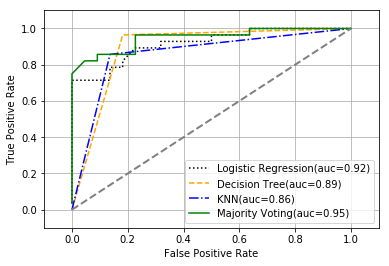

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf,label,clr,ls in zip(all_clf, clf_labels, colors,linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    # print(y_pred)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s(auc=%.2f)'% (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

/home/lily/tf3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


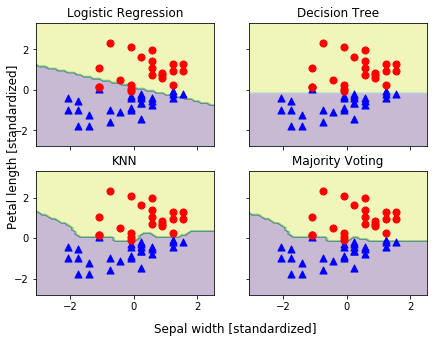

In [133]:
# 为了查看决策树的决策边界，现将training set做标准化处理
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
from itertools import product
x_min = X_train_std[:,0].min() - 1
x_max = X_train_std[:,0].max() + 1
y_min = X_train_std[:,1].min() - 1
y_max = X_train_std[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr = plt.subplots(nrows=2, ncols=2, sharex='col',sharey='row',figsize=(7,5))
for idx, clf, tt in zip(product([0,1],[0,1]),all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx[0],idx[1]].scatter(X_train_std[y_train==0,0],X_train_std[y_train==0,1],c='blue',marker='^',s=50)
    axarr[idx[0],idx[1]].scatter(X_train_std[y_train==1,0],X_train_std[y_train==1,1],c='red',marker='o',s=50)
    axarr[idx[0],idx[1]].set_title(tt)
plt.text(-3.5, -4.5, s='Sepal width [standardized]', ha='center', va='center', fontsize=12)
plt.text(-10.5, 4.5, s='Petal length [standardized]', ha='center', va='center', fontsize=12, rotation=90)
plt.show()

In [127]:
for idx in product([0,1],[0,1]):
    print(idx)

(0, 0)
(0, 1)
(1, 0)
(1, 1)


In [135]:
# 在调整单独的分类器的参数之前，首先查看参数
mv_clf.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': False,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 

In [137]:
from sklearn.grid_search import GridSearchCV
params = {'decisiontreeclassifier__max_depth': [1,2],\
          'pipeline-1__clf__C': [0.001,0.1,100.0]}
grid = GridSearchCV(estimator=mv_clf, param_grid=params, cv=10, scoring='roc_auc')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=MajorityVoteClassifier(classifiers=[Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', ra...ski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')]])],
            vote='classlabel', weights=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__max_depth': [1, 2], 'pipeline-1__clf__C': [0.001, 0.1, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [141]:
for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f+/-%.2f %r"%(mean_score, scores.std()/2,params))

0.967+/-0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.967+/-0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
1.000+/-0.00 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.967+/-0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.967+/-0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
1.000+/-0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}


#### bagging 

In [143]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash',\
                   'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols',\
                   'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines',\
                   'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values
# 将class labels用二进制格式表示， 将数据集拆分为trainset 和test set
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.40, random_state=1)

In [146]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True,\
                      bootstrap_features=False, n_jobs=1, random_state=1)

In [148]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.854


In [149]:
bag = bag.fit(X_train,y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train,y_train_pred)
bag_test = accuracy_score(y_test,y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.896


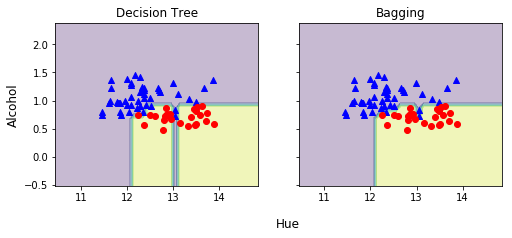

In [156]:
x_min = X_train[:,0].min() - 1
x_max = X_train[:,0].max() + 1
y_min = X_train[:,1].min() - 1
y_max = X_train[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr = plt.subplots(nrows=1, ncols=2, sharex='col',sharey='row',figsize=(8,3))
for idx, clf, tt in zip([0,1], [tree,bag],['Decision Tree','Bagging']):
    clf.fit(X_train,y_train)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #print(Z.shape) #(3534,)
   # print(xx.ravel().shape) #(3534,)
    #print(np.c_[xx.ravel(),yy.ravel()].shape) #(3534, 2)
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue',ha='center', va='center', fontsize=12)
plt.show()


由于集成算法类似与于bagging无法减小模型的偏差，所以在分类器的集成算法当中，我们倾向于选用低偏差的分类器，类似于非剪枝树。

### 下面讨论通过自适应的增强算法来提升弱学习器性能：Adaboost(Adaptive boosting)
不同于bagging集成算法，boosting在减少方差的同时也减少了模型的偏差。

In [160]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train,y_train_pred)
ada_test = accuracy_score(y_test,y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'% (ada_train, ada_test)) # 在这里降低了偏差，但是引入了一点方差

Decision tree train/test accuracies 0.845/0.854
AdaBoost train/test accuracies 1.000/0.875


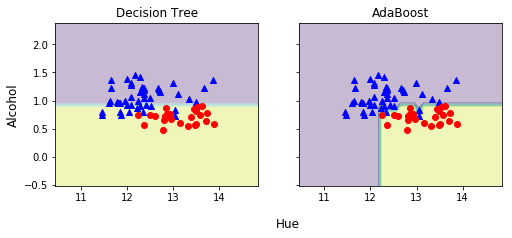

In [161]:
x_min = X_train[:,0].min() - 1
x_max = X_train[:,0].max() + 1
y_min = X_train[:,1].min() - 1
y_max = X_train[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr = plt.subplots(nrows=1, ncols=2, sharex='col',sharey='row',figsize=(8,3))
for idx, clf, tt in zip([0,1], [tree,ada],['Decision Tree','AdaBoost']):
    clf.fit(X_train,y_train)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #print(Z.shape) #(3534,)
   # print(xx.ravel().shape) #(3534,)
    #print(np.c_[xx.ravel(),yy.ravel()].shape) #(3534, 2)
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue',ha='center', va='center', fontsize=12)
plt.show()